In [1]:
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import cv2
print("Packages loaded")

Packages loaded


In [2]:
os.chdir("/storage/srgan-1-master/vgg19/cyto/train/")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/storage/srgan-1-master/vgg19/cyto/train/'

# DO: Fix the order of import to rgb

In [3]:
imred = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/846_F11_2_red-1.tif")
imgreen = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/846_F11_2_green-1.tif")
imblue = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/846_F11_2_blue-1.tif")
imyellow = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/846_F11_2_yellow-1.tif")


In [4]:
imred2 = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/111_G6_1_red.tif")
imgreen2 = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/111_G6_1_blue.tif")
imblue2 = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/111_G6_1_green.tif")
imyellow2 = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/111_G6_1_yellow.tif")

In [5]:
imred.shape

(800, 800, 3)

In [9]:
np.sum(imblue2[:,:,0] != imblue2[:,:,1] )

0

# When intensities are equal

In [10]:
b,g,r = cv2.split(imred)
b1,g1,r1 = cv2.split(imblue)
b2,g2,r2 = cv2.split(imgreen)
b3,g3,r3 = cv2.split(imyellow)

final_img = np.zeros_like(imred)
final_img[:,:,0] = b  # red
final_img[:,:,1] = b2 # b2 = green
final_img[:,:,2] = b1 # blue

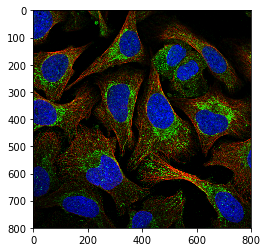

In [11]:
plt.imshow(final_img)
plt.show()

In [12]:
imagej = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/846_composite.png")


In [13]:
imagej[:,:,0] != final_img[:,:,0]

C:\Users\Saurabh\Anaconda3\envs\tf35\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


True

# When intensities are not equal

In [14]:
b,g,r = cv2.split(imred)
b1,g1,r1 = cv2.split(imblue)
b2,g2,r2 = cv2.split(imgreen)
b3,g3,r3 = cv2.split(imyellow)

In [15]:
rsum =  r+r1+r2 + r3
gsum = g+g1+g2 + g3
bsum = b+b1+b2 + b3

In [16]:
print(((r)/rsum*255).argmax())

283


In [17]:
imred[:,:,0].min()

0

In [18]:
final_img.max()

255

In [19]:
final_img = np.zeros_like(imred2)
final_img[:,:,0] = r+r1+r2 + r3  # red + yr
final_img[:,:,1] = g+g1+g2 + g3  # green + yb
final_img[:,:,2] = b+b1+b2 + b3  # blue + yg

In [20]:
r_prime = r / 255
g_prime = g1/255
b_prime = b2/255
y_prime = b3/255

In [21]:
sum = r_prime + g_prime + b_prime + y_prime


In [22]:
merged_img = np.zeros_like(imred)
merged_img[:,:,0] = r_prime / sum * 255
merged_img[:,:,1] = g_prime / sum * 255
merged_img[:,:,2] = b_prime / sum * 255

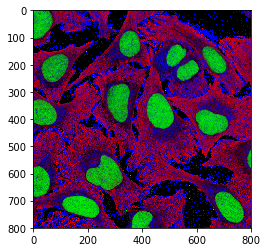

In [23]:
plt.imshow(merged_img)
plt.show()

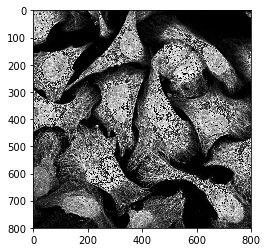

In [24]:
plt.imshow(final_img)
plt.show()

# Normalisation

In [22]:
b,g,r = cv2.split(final_img)
b1,g1,r1 = cv2.split(final_img)
b2,g2,r2 = cv2.split(final_img)
b3,g3,r3 = cv2.split(final_img)

In [23]:
final_img[:,:,0] = r/
final_img[:,:,1] = g/r+g+b
final_img[:,:,2] = b/r+g+b

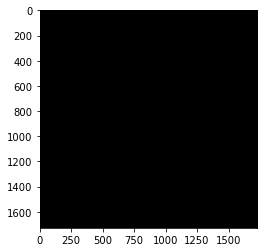

In [24]:
plt.imshow(final_img)
plt.show()

In [3]:
imgreen.shape

(2048, 2048, 3)

In [4]:
img2 = cv2.merge((imred,imblue,imgreen))

In [5]:
img2.shape

(2048, 2048, 9)

In [75]:
b,g,r = cv2.split(imred)
b1,g1,r1 = cv2.split(imblue)
b2,g2,r2 = cv2.split(imgreen)
b3,g3,r3 = cv2.split(imyellow)

bsum = (b + b1 + b2 + b3)
gsum = (g + g1 + g2 + g3)
rsum = (r + r1 + r2+ r3)

In [76]:
ti = cv2.merge((bsum,gsum,rsum))

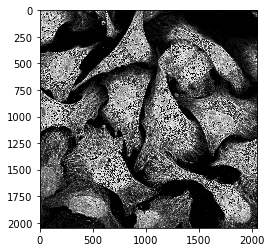

In [77]:
plt.imshow(ti)
plt.show()

In [20]:
img2 = np.zeros_like(imred)


In [82]:
img2[:,:,0] = bsum 
img2[:,:,1] = gsum 
img2[:,:,2] = rsum 

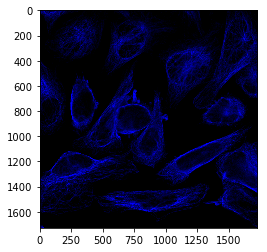

In [154]:
plt.imshow(imred[:,:,])
plt.show()

In [94]:
np.sum(imred[:,:,0] != imred[:,:,1] )

0

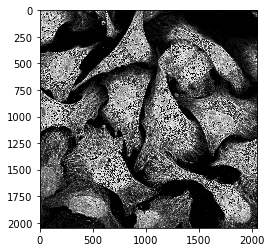

In [68]:
plt.imshow(img2[:,:,])
plt.show()

In [55]:
merged_img = cv2.merge((bsum,gsum,rsum))

In [56]:
merged_img.shape

(2048, 2048, 3)

In [9]:
#cv2.imshow("srh",merged_img)

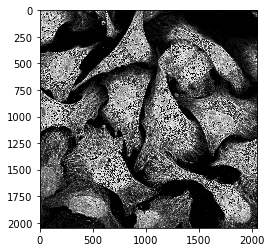

In [57]:
plt.imshow(merged_img)
plt.show()

In [58]:
b1,g1,r1 = cv2.split(merged_img)


In [66]:
merged_img[:,:,0] = r1/((b1+g1+r1)/255)
merged_img[:,:,1] = b1/((b1+g1+r1)/255)
merged_img[:,:,2] = g1/((b1+g1+r1)/255)

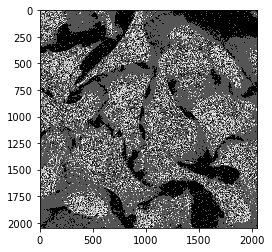

In [67]:
plt.imshow(merged_img)
plt.show()

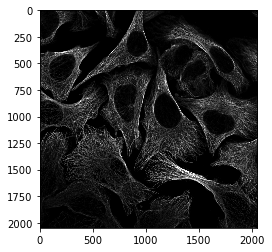

In [11]:
plt.imshow(imred)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'getdata'

In [108]:
final_img = np.zeros_like(imred)
final_img[:,:,0] = b  # red
final_img[:,:,1] = b2 # b2 = green
final_img[:,:,2] = b1 # blue

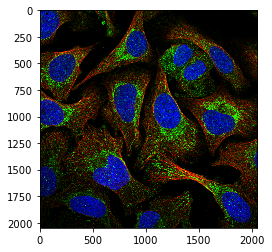

In [109]:
plt.imshow(final_img)
plt.show()

In [121]:

cv2.imwrite("flip2a.png", final_img)

True

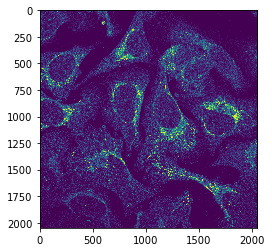

In [117]:
plt.imshow(final_img[:,:,1])
plt.show()

In [242]:
files = os.listdir("C:/Users/Saurabh/Desktop/cyto2017/classes/")
bag = []
for f in files:
    if f.endswith('.tif'):
        #bag.append(f)
        bag = f
        print(bag)
#print(bag)

111_G6_1_blue.tif
111_G6_1_green.tif
111_G6_1_red.tif
111_G6_1_yellow.tif
846_F11_2_blue-1.tif
846_F11_2_green-1.tif
846_F11_2_red-1.tif
846_F11_2_yellow-1.tif


In [243]:
imgfiles = [f for f in files if f.endswith(".tif")]

In [241]:
print(imgfiles)

['111_G6_1_blue.tif', '111_G6_1_green.tif', '111_G6_1_red.tif', '111_G6_1_yellow.tif', '846_F11_2_blue.tif', '846_F11_2_green.tif', '846_F11_2_red.tif', '846_F11_2_yellow.tif']


In [135]:
a = []
b = []
a = imgfiles
for i in range(0,len(imgfiles)): # Selected file to match with other images
    a = imgfiles
    y = x[i].split("_",3)
    
 
    for j in range(0,len(imgfiles)): # Searching for other images to match to the orignal
        matchcase = imgfiles
        match_split = matchcase[i].split("_",3)
        if y[3] == match_split[3] and x[i] == matchcase[j] : #wrong
            print(x[i],"is equal to",matchcase[j])
            # Let the  Merging and saving begin here
            #for k in range(0,3):
                

111_G6_1_blue.tif is equal to 111_G6_1_blue.tif
111_G6_1_green.tif is equal to 111_G6_1_green.tif
111_G6_1_red.tif is equal to 111_G6_1_red.tif
111_G6_1_yellow.tif is equal to 111_G6_1_yellow.tif
846_F11_2_blue.tif is equal to 846_F11_2_blue.tif
846_F11_2_green.tif is equal to 846_F11_2_green.tif
846_F11_2_red.tif is equal to 846_F11_2_red.tif
846_F11_2_yellow.tif is equal to 846_F11_2_yellow.tif


In [146]:
a = imgfiles[0]
print(a)
b = a.split("_",4)
for i in range(0,len(imgfiles)): # Selected file to match with other images
    if a.split()
                

111_G6_1_blue.tif


In [156]:
a = "111_G6_1_blue.tif"
splt = a.split("_",4)
print(splt)

['111', 'G6', '1', 'blue.tif']


In [238]:
imgfiles = [f for f in files if f.endswith(".tif")]
print(imgfiles)

['111_G6_1_blue.tif', '111_G6_1_green.tif', '111_G6_1_red.tif', '111_G6_1_yellow.tif', '846_F11_2_blue.tif', '846_F11_2_green.tif', '846_F11_2_red.tif', '846_F11_2_yellow.tif']


In [213]:
a = []
for i in range(0,len(imgfiles)):
    a = imgfiles[i]
    splt = a.split("_",4)
    print(splt)

['111', 'G6', '1', 'blue.tif']
['111', 'G6', '1', 'green.tif']
['111', 'G6', '1', 'red.tif']
['111', 'G6', '1', 'yellow.tif']
['846', 'F11', '2', 'blue.tif']
['846', 'F11', '2', 'green.tif']
['846', 'F11', '2', 'red.tif']
['846', 'F11', '2', 'yellow.tif']


In [239]:
for i in range(0,len(imgfiles)):
    a = imgfiles[i]
    print(a)

111_G6_1_blue.tif
111_G6_1_green.tif
111_G6_1_red.tif
111_G6_1_yellow.tif
846_F11_2_blue.tif
846_F11_2_green.tif
846_F11_2_red.tif
846_F11_2_yellow.tif


# Merging image channels (Get all images in the same size)

dim shape is (1728, 1728, 3)
['111', 'G6', '1', 'blue.tif']
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
.....................
(1728, 1728, 3)
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
dim shape is (1728, 1728, 3)
['111', 'G6', '1', 'green.tif']
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
.....................
(1728, 1728, 3)
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
dim shape is (1728, 1728, 3)
['111', 'G6', '1', 'red.tif']
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
.....................
(1728, 1728, 3)
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
dim shape is (1728, 1728, 3)
['111', 'G6', '1', 'yellow.tif']
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
.....................
(1728, 1728, 3)
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
dim shape is (1728, 1728, 3)
['846', 'F11', '2', 'blue-1.tif']
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
shape is  (1728, 1728, 3)
dim shape is (1728, 172

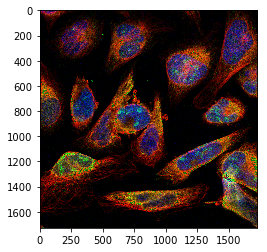

In [248]:

#img = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/111_G6_1_blue.tif")
#res = cv2.resize(img,(1000,1000), interpolation = cv2.INTER_CUBIC)
#cv2.imwrite("resized.tif",res)
#files = os.listdir("C:/Users/Saurabh/Desktop/cyto2017/classes/")
# imgfiles = [f for f in files if f.endswith(".tif")]
path = "C:/Users/Saurabh/Desktop/cyto2017/classes/"

#Seperate the resizing script with the merging script

for i in range(0,len(imgfiles)):
    img = cv2.imread(path + imgfiles[i])
    res = cv2.resize(img,(800,800), interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(imgfiles[i],res)

a = []
for i in range(0,len(imgfiles)):
    a = imgfiles[i]
    dim = cv2.imread(path + a)
    print("dim shape is",dim.shape)
    splt = a.split("_",4)
    print(splt)

    for i in imgfiles:
        splt2 = i.split("_",4)
        #print(splt2)
        if splt2[0:2] == splt[0:2]:
            #print("srg")
            if splt2[3] == 'red.tif':
                #print(path + str(i))
                #print(splt2[3])
                print(".....................")
                imred = cv2.imread(path + str(i))
                print(imred.shape)
                b,g,r = cv2.split(imred)
                #print(imred.shape) 
                #imred = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/"+ i)
                #imred.shape
                #b,g,r = cv2.split(imred)
                #print("done")
            elif splt2[3] == 'green.tif':
                #print(path + str(i))
                #print(splt2[3])
                imgreen = cv2.imread(path + str(i))
                b2,g2,r2 = cv2.split(imgreen)
                #print("GREEN")

            elif splt2[3] == 'blue.tif':
                #print(path + str(i))
                #print(splt2[3])
                imblue = cv2.imread(path + str(i))
                b3,g3,r3 = cv2.split(imblue)
                #print("BLUE")

            elif splt2[3] == 'yellow.tif':
               # print(path + str(i))
                #print(splt2[3])
                imyellow = cv2.imread(path + str(i))
                b4,g4,r4 = cv2.split(imyellow)
                #print("YELLOW")
                
            # Instensity distinction between channels (Add a conditional here)     

            final_img = np.zeros_like(imyellow) # change dimensions here for universal broadcasting
            print("shape is ",final_img.shape)
            final_img[:,:,0] = r+r2 + r3 + r4 # red + yr
            final_img[:,:,1] = g+g2 + g3 + g4  # green + yb
            final_img[:,:,2] = b+b2 + b3 +b4 # blue + yg
            
            #final_img[:,:,2] = r+r2 + r3 + r4 # red + yr
            #final_img[:,:,1] = g+g2 + g3 + g4  # green + yb
            #final_img[:,:,0] = b+b2 + b3 +b4 # blue + yg

                #print(final_img.shape)
            os.chdir("C:/Users/Saurabh/Desktop/cyto2017/classes/")
            cv2.imwrite(i[0:7] + "50_50_125.png",final_img)

            
plt.imshow(final_img)
    
plt.show()
            
        
        

In [253]:
imgfiles = [f for f in files if f.endswith(".tif")]
print(imgfiles)

['111_G6_1_blue.tif', '111_G6_1_green.tif', '111_G6_1_red.tif', '111_G6_1_yellow.tif', '846_F11_2_blue-1.tif', '846_F11_2_green-1.tif', '846_F11_2_red-1.tif', '846_F11_2_yellow-1.tif']


In [249]:
img = cv2.imread("C:/Users/Saurabh/Desktop/cyto2017/classes/111_G6_1_blue.tif")
res = cv2.resize(img,(1000,1000), interpolation = cv2.INTER_CUBIC)
cv2.imwrite("resized.png",res)


True

In [140]:
b = x[1].split("_",4)

In [141]:
b[1]

'G6'